# Анализ окупаемости рекламы приложения Procrastinate Pro+

![logo1.jpg](https://github.com/mangusta-n/miniprojects/blob/main/logo1.jpg?raw=true)

**Описание данных**  

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

Лог сервера с информацией о посещениях сайта - `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.


Информация о заказах - `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.


Информация о расходах на рекламу - `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Цель и задачи исследования

**Цель проекта**   
Найти источник проблемы окупаемости маркетинговых расходов развлекательного приложения Procrastinate Pro+.
  
**Задачи проекта**  


1. Загрузка и предобработка данных
  
  
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии, построения графиков. 
  
  
3. Исследовательский анализ данных  

    3.1. Составить профили пользователей. Минимальная и максимальная даты привлечения пользователей.  
    3.2. Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей?  
    3.3. Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи?   
    3.4. Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей.  
      
      
4. Маркетинг

    4.1. Общая сумма расходов на маркетинг.  
    4.2. Как траты распределены по рекламным источникам?  
    4.3. Визуализировать динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику.  
    4.4. Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника?  
    

5. Оценка окупаемости рекламы
    
    5.1. Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.  
    5.2. Анализ конверсии пользователей и динамику её изменения. Анализ Retention.  
    5.3. Анализ окупаемости рекламы с разбивкой по устройствам. (графики LTV и ROI, графики динамики LTV, CAC и ROI).  
    5.4. Анализ окупаемости рекламы с разбивкой по странам. (графики LTV и ROI, графики динамики LTV, CAC и ROI).  
    5.5. Анализ окупаемости рекламы с разбивкой по рекламным каналам. (графики LTV и ROI, графики динамики LTV, CAC и ROI).   
    5.6. Анализ конверсии пользователей и динамики её изменения, анализ Retention с разбивкой по каналам привлечения клиентов


6. Вывод: причины неэффективности привлечения пользователей, рекомендации для отдела маркетинга.

## Загрузка и предобработка данных

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
sns.set(
    font_scale=1.3,
    style="white",
    rc={'figure.figsize':(15,5)}
        )

In [3]:
try:
    visits, orders, costs = (pd.read_csv('visits_info_short.csv'),
                            pd.read_csv('orders_info_short.csv'),
                            pd.read_csv('costs_info_short.csv'))
except:
    visits, orders, costs = (pd.read_csv('/datasets/visits_info_short.csv'),
                            pd.read_csv('/datasets/orders_info_short.csv'),
                            pd.read_csv('/datasets/costs_info_short.csv'))

In [4]:
visits.head(3)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


In [5]:
orders.head(3)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


In [6]:
costs.head(3)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Мы загрузили данные: в логах посещения 309901 запись, в датасете с покупками 40212, в датасете с расходами на маркетинг - 1800. Пропусков нет, однако datetime колонки с неверным типом данных, исправим это на этапе предобработки.

### Предобработка данных

Сверим еще раз наличие пропусков, проверим дубликаты, приведем название колонок к snake_case, и поменяем тип колонок с датой и временем на datetime. 

In [10]:
# check missing values
visits.isna().sum().sum() + orders.isna().sum().sum() + costs.isna().sum().sum()

0

In [11]:
# check duplicates
visits.duplicated().sum() + orders.duplicated().sum() + costs.duplicated().sum()

0

Пропусков и полных дубликатов нет. Проверим еще неявные дубликаты - теоретически они могут быть в `visits` и `costs` (в категориальных переменных). Посмотрим на уникальные значения этих переменных.

In [12]:
visits.Region.unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [13]:
visits.Device.unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [14]:
visits.Channel.unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [15]:
costs.Channel.unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дубликатов в категориальных переменных нет. Приведем названия колонок к snake_case.

In [16]:
visits = visits.rename(columns=lambda x: x.lower().replace(' ', '_'))
orders = orders.rename(columns=lambda x: x.lower().replace(' ', '_'))
costs = costs.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [17]:
# check
display(visits.sample(1))
display(orders.sample(1))
display(costs.sample(1))

,user_id,region,device,channel,session_start,session_end
79369,992888044733,United States,iPhone,organic,2019-07-18 23:29:59,2019-07-19 00:33:38


,user_id,event_dt,revenue
2276,597586317797,2019-06-02 22:43:14,4.99


,dt,channel,costs
1406,2019-09-24,OppleCreativeMedia,16.5


Поменяем тип колонок с датой и временем на datetime. Это колонки session_start, session_end, event_dt, dt.

In [18]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [19]:
# check
display(visits.dtypes, orders.dtypes, costs.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object

Мы провели предобработку данных для дальнейшего анализа: изменили навания колонок на snake_case и изменили тип данных в колонках с датой. В данных нет пропусков и дубликатов.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии, построения графиков

Будем использовать в дальнейших расчетах и анализе следующие функции:

In [20]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    
    """ Функция для создания пользовательских профилей."""
    
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [21]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """ Функция для расчёта удержания - Retention.
    
    Возвращает сырые данные, таблицу удержания, таблицу динамики удержания.
    """

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, 
                            dims, 
                            horizon_days):
        
        """Функция группировки по желаемым признакам"""
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [22]:
def get_conversion(profiles,
                   purchases,
                   observation_date,
                   horizon_days,
                   dimensions=[],
                   ignore_horizon=False,
                  ):
    
    """ Функция для расчета конверсии.
    
    Возвращает сырые данные, таблицу конверсии, таблицу динамики конверсии.
    """

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, 
                            dims, 
                            horizon_days
                           ):
        """Функция группировки по желаемым признакам"""
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [23]:
def get_ltv(profiles,
            purchases,
            observation_date,
            horizon_days,
            dimensions=[],
            ignore_horizon=False,
           ):

    """Функция для расчёта LTV и ROI.
    
    Возвращает сырые данные, таблицу LTV, таблицу динамики LTV, таблицу ROI, таблицу динамики ROI.
    """
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, 
                            dims, 
                            horizon_days):
        
        """Функция группировки по желаемым признакам"""
        
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функции для визуализации этих метрик — `filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi()`


In [24]:
def filter_data(df, window):
    
    """ Функция для сглаживания фрейма."""
    
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [25]:
def plot_retention(retention, 
                   retention_history, 
                   horizon, 
                   window=7
                  ):
    """ Функция для визуализации удержания.
    
    Графики: кривые удержания платящих пользователей, кривые удержания неплатящих пользователей,
    динамика удержания платящих пользователей, динамика удержания неплатящих пользователей.
    """
    

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 11))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [26]:
def plot_conversion(conversion, 
                    conversion_history, 
                    horizon, 
                    window=7
                   ):

    """ Функция для визуализации конверсии.
    
    Графики: кривые конверсии, динамика конверсии.
    """
    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 6))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [27]:
def plot_ltv_roi(ltv, 
                 ltv_history, 
                 roi, 
                 roi_history, 
                 horizon, 
                 window=7
                ):
    
    """ Функция для визуализации LTV, CAC, ROI.
    
    Графики: кривые LTV, динамика LTV, динамика CAC, кривые ROI, динамика ROI.
    """

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(22, 11))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных
### Профили пользователей. Минимальная и максимальная даты привлечения пользователей.

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу Procrastinate Pro+.

In [28]:
# зададим events, так как других событий, кроме рекламы, в данных нет
events = None 

In [29]:
profiles = get_profiles(visits, orders, events, costs)

In [30]:
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [31]:
profiles.shape

(150008, 9)

In [32]:
print(f'''Минимальная дата привлечения пользователей {profiles.first_ts.min().date()},
максимальная дата привлечения пользователей {profiles.first_ts.max().date()}, 
даты первого и и последнего дня расходов на рекламу совпадают с данными о посещениях 
{costs.dt.min()} - {costs.dt.max()}''')

Минимальная дата привлечения пользователей 2019-05-01,
максимальная дата привлечения пользователей 2019-10-27, 
даты первого и и последнего дня расходов на рекламу совпадают с данными о посещениях 
2019-05-01 - 2019-10-27


Таким образом мы подтвердили, что у нас есть данные о привлечённых с 1 мая по 27 октября 2019 года пользователях: 
150008 пользовательских профилей(платящих и нет), в каждом из которых есть данные о дате первого посещения, девайсе, рекламном источнике, который мотивировал пользователя посетить приложение, и средней ценой приввлечения.

### Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей? 

Следующие задания похожи, так что для изучения профилей пользователей и соотношения платящих и неплатящих по разным критериям напишем функцию, которая будет строить нам таблицу с числом пользователей, платящих пользователей, процентом польвователей от общего из количества и долей платящих, в %, по категориям.

In [33]:
def profiles_EDA(criterion=[]):
    """ Строим таблицу соотношения платящих и неплатящих пользователей по критерию/ям"""
    return profiles\
        .groupby(criterion, as_index=False)\
        .agg({'user_id': 'count',
             'payer': 'sum'})\
        .rename(columns={'user_id': 'users',
                        'payer': 'paying_users'})\
        .assign(percent_of_total_users=lambda x: (100 * x.users / x.users.sum()).round(2))\
        .assign(payer_percent=lambda x: (x.paying_users / x.users * 100).round(2))\
        .sort_values('payer_percent', ascending=False)\
        .style.background_gradient('Greens')

In [34]:
profiles_EDA('region')

,region,users,paying_users,percent_of_total_users,payer_percent
3,United States,100002,6902,66.660000,6.900000
1,Germany,14981,616,9.990000,4.110000
2,UK,17575,700,11.720000,3.980000
0,France,17450,663,11.630000,3.800000


Как мы видим, больше всего пользователей - 66% от всех - приходят из США, доля платящих пользователей из этой страны также наибольшая (6,9%). Также приложением пользуются клиенты из Германии, Франции и Великобритании, но их значительно меньше, и доля платящих среди них меньше(около 4%).

### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи?

In [35]:
profiles_EDA('device')

,device,users,paying_users,percent_of_total_users,payer_percent
1,Mac,30042,1912,20.030000,6.360000
3,iPhone,54479,3382,36.320000,6.210000
0,Android,35032,2050,23.350000,5.850000
2,PC,30455,1537,20.300000,5.050000


Доля платящих пользователей выше у пользователей, заходящих с Mac и Айфонов, чем с Андроида и PC, но ненамного. Больше всего пользователей поьзуются Айфоном. Посмотрим еще на распределение по странам и устройствам.

In [36]:
profiles_EDA(['region','device'])

,region,device,users,paying_users,percent_of_total_users,payer_percent
12,United States,Android,20199,1487,13.470000,7.360000
13,United States,Mac,24842,1706,16.560000,6.870000
14,United States,PC,10432,715,6.950000,6.850000
15,United States,iPhone,44529,2994,29.680000,6.720000
1,France,Mac,1838,82,1.230000,4.460000
6,Germany,PC,5945,253,3.960000,4.260000
10,UK,PC,7138,301,4.760000,4.220000
4,Germany,Android,4440,182,2.960000,4.100000
7,Germany,iPhone,3012,120,2.010000,3.980000
8,UK,Android,5141,202,3.430000,3.930000


Мы видим, что в разрезе стран и устройств, максимальная доля платящих пользователей - это поьзователи Android из США, хотя пользователей Айфонов количественно больше.

### Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей.

In [37]:
profiles_EDA('channel')

,channel,users,paying_users,percent_of_total_users,payer_percent
1,FaceBoom,29144,3557,19.430000,12.200000
0,AdNonSense,3880,440,2.590000,11.340000
9,lambdaMediaAds,2149,225,1.430000,10.470000
6,TipTop,19561,1878,13.040000,9.600000
5,RocketSuperAds,4448,352,2.970000,7.910000
7,WahooNetBanner,8553,453,5.700000,5.300000
8,YRabbit,4312,165,2.870000,3.830000
3,MediaTornado,4364,156,2.910000,3.570000
2,LeapBob,8553,262,5.700000,3.060000
4,OppleCreativeMedia,8605,233,5.740000,2.710000


Построив таблицу по рекламным каналам, видим, что лучше всего привлекают платящих пользователей FaceBoom (доля платящих пользователей 12,2%), AdNonSense (11,3%) и lambdaMediaAds (10,47%). По количеству пользователей на первом месте органический трафик (37% от всех полльзователей приложения), но качественно он худший (платящих среди них 2%). На втором месте по количеству FaceBoom (19% от всех пользователей приходят через него). Посмотрим на рекламные каналы по странам

In [38]:
profiles_EDA(['region','channel'])

,region,channel,users,paying_users,percent_of_total_users,payer_percent
18,United States,FaceBoom,29144,3557,19.430000,12.200000
6,Germany,AdNonSense,1219,142,0.810000,11.650000
12,UK,AdNonSense,1295,148,0.860000,11.430000
4,France,lambdaMediaAds,742,82,0.490000,11.050000
0,France,AdNonSense,1366,150,0.910000,10.980000
10,Germany,lambdaMediaAds,649,67,0.430000,10.320000
16,UK,lambdaMediaAds,758,76,0.510000,10.030000
21,United States,TipTop,19561,1878,13.040000,9.600000
20,United States,RocketSuperAds,4448,352,2.970000,7.910000
9,Germany,WahooNetBanner,2579,148,1.720000,5.740000


По доле платящих пользователей наиболее эффективный канал FaceBoom (USA), на втором и 3 месте AdNonSense и lambdaMediaAds (разные страны), четвертое место у канала TipTop (качество привлеченных через него пользователей хуже, но количественно он дает больше платящих, чем 2 и 3 места, за счет высококо трафика). Также по этой таблице мы можем видеть, что рекламные каналы кардинально отличаются у США и остальных стран. И органический трафик очень плох во всех странах.

## Маркетинг

### Общая сумма расходов на маркетинг.


In [39]:
print(f'Общая сумма расходов на маркетинг за отчетный период - {costs.costs.sum().round(2)} долларов')

Общая сумма расходов на маркетинг за отчетный период - 105497.3 долларов


### Как траты распределены по рекламным источникам?


In [40]:
costs\
        .groupby('channel', as_index=False)\
        [['costs']]\
        .sum()\
        .assign(percent_of_total=lambda x: (100 * x.costs / x.costs.sum()).round(2))\
        .style.background_gradient('Greens')

,channel,costs,percent_of_total
0,AdNonSense,3911.250000,3.710000
1,FaceBoom,32445.600000,30.750000
2,LeapBob,1797.600000,1.700000
3,MediaTornado,954.480000,0.900000
4,OppleCreativeMedia,2151.250000,2.040000
5,RocketSuperAds,1833.000000,1.740000
6,TipTop,54751.300000,51.900000
7,WahooNetBanner,5151.000000,4.880000
8,YRabbit,944.220000,0.900000
9,lambdaMediaAds,1557.600000,1.480000


Мы видим, что среди рекламных каналов с большим отрывом выходит вперед TipTop - больше половины рекламного бюджета было потрачено на него. На втором месте FaceBoom (около 30%)

### Визуализировать динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику.


Для визуализации динамики изменений сгруппируем расходы по дате, и построим графики - по месяцам и неделям.

In [41]:
costs['datetime'] = pd.DatetimeIndex(costs.dt)

In [42]:
costs_pivot = costs.pivot_table(index='datetime', 
                                columns='channel', 
                                values="costs", 
                                aggfunc='sum')

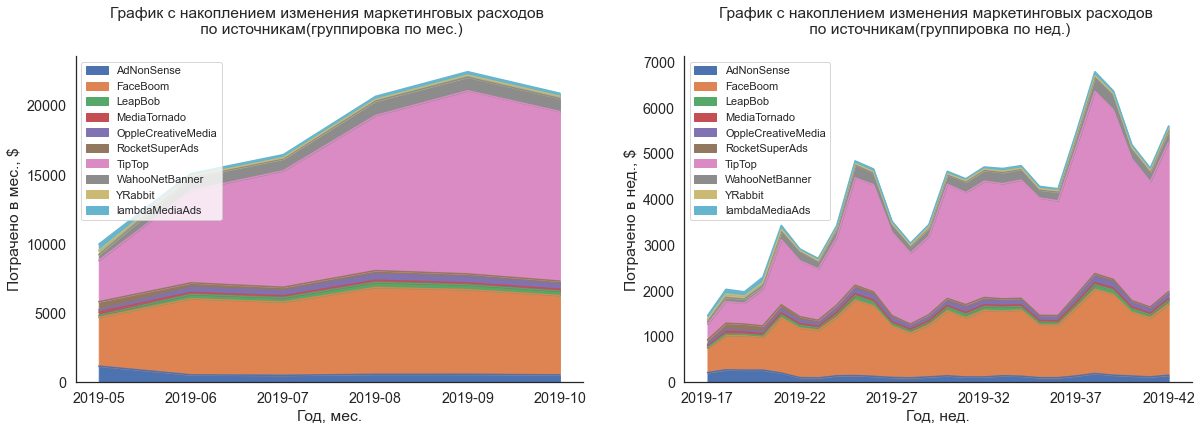

In [43]:
time_periods = {'мес.':'m', 'нед.': 'W'}
fig, axes = plt.subplots(1, len(time_periods), figsize=(20,6))
axes = axes.flatten()
for period, ax in zip(time_periods.items(), axes):
    pivot_to_plot = costs_pivot.resample(period[1]).sum()
    pivot_to_plot.index = pivot_to_plot.index.strftime(f'%Y-%{period[1]}')
    
    pivot_to_plot.plot.area(
        ax=ax, 
        title=f'График с накоплением изменения маркетинговых расходов \n по источникам(группировка по {period[0]})\n ',
        ylabel=f'Потрачено в {period[0]}, $',
        xlabel=f'Год, {period[0]}')
    ax.legend(loc='upper left', fontsize=11)
    plt.subplots_adjust(hspace=0.3)
    sns.despine()

Мы видим, что с конца мая маркетинговые расходы по каналу TipTop выходят на первое место и стабильно увеличиваются с каждым месяцем. В понедельной разбивке присутствует некоторая ссезонность, но тенденция к росту остается очевидной.

### Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника?


In [44]:
profiles.groupby('channel', as_index=False)\
                [['acquisition_cost']]\
                .mean()\
                .sort_values('acquisition_cost', ascending=False)\
                .style.background_gradient('Greens')

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


Мы видим, что средняя стоимость привлечения пользователя по каналу TipTop больше, чем в 2 раза превышает CAC даже на приносящий больше всего трафика среди платных каналов (и наиболее эффективный) FaceBoom. 

**Вывод**:  
Проанализировав расходы на рекламу, мы выяснили, что по итогам 5 месяцеа больше половины рекламного бюджета (54751.3 из 105497.3 долларов) было потрачено на канал TipTop (На втором месте FaceBoom (около 30%)). Причем расходы на TipTop с конца мая  выходят на первое место среди всех остальных, и стабильно увеличиваются с каждым месяцем. По итогам пяти месяцев CAC по каналу TipTop более, чем вдвое превысил CAC даже на приносящий больше всего трафика среди платных каналов (и наиболее эффективный) FaceBoom.  

Кажется, мы нашли возможный источник наших убытков. Но чтобы понять, оправдано ли такое распределение маркетингового бюджета, нам обязательно нужно оценить, сколько прибыли приносят нам пользователи, пришедшие через этот (и другие каналы), что мы и сделаем далее. Нельзя исключать, что эти вложения окупаются.

## Оценка окупаемости рекламы

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Для начала оценим ситуацию окупаемости в целом, без разбивки по категориям. Используем для этого определенные в начале функции.  Однако, так как мы исследуем окупаемость рекламы, исключим из данных профили пользователей, с органическим источником трафика - так как они нам ничего не стоят, эти данные будут размывать результат оценки платных каналов дистрибуции.

Воодные данные: сегодня 1 ноября 2019 года(дата наблюдения), а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения (горизонт наблюдений 14 дней). 

In [45]:
profiles_no_org = profiles[profiles.channel != 'organic']

In [46]:
observation_date = datetime(2019, 11, 1).date()

In [47]:
horizon_days = 14

**LTV, CAC и ROI всех пользователей**

In [48]:
(result_raw, 
 ltv, 
 ltv_history, 
 roi, 
 roi_history) = get_ltv(profiles_no_org,
                        orders,
                        observation_date,
                        horizon_days,
                       )

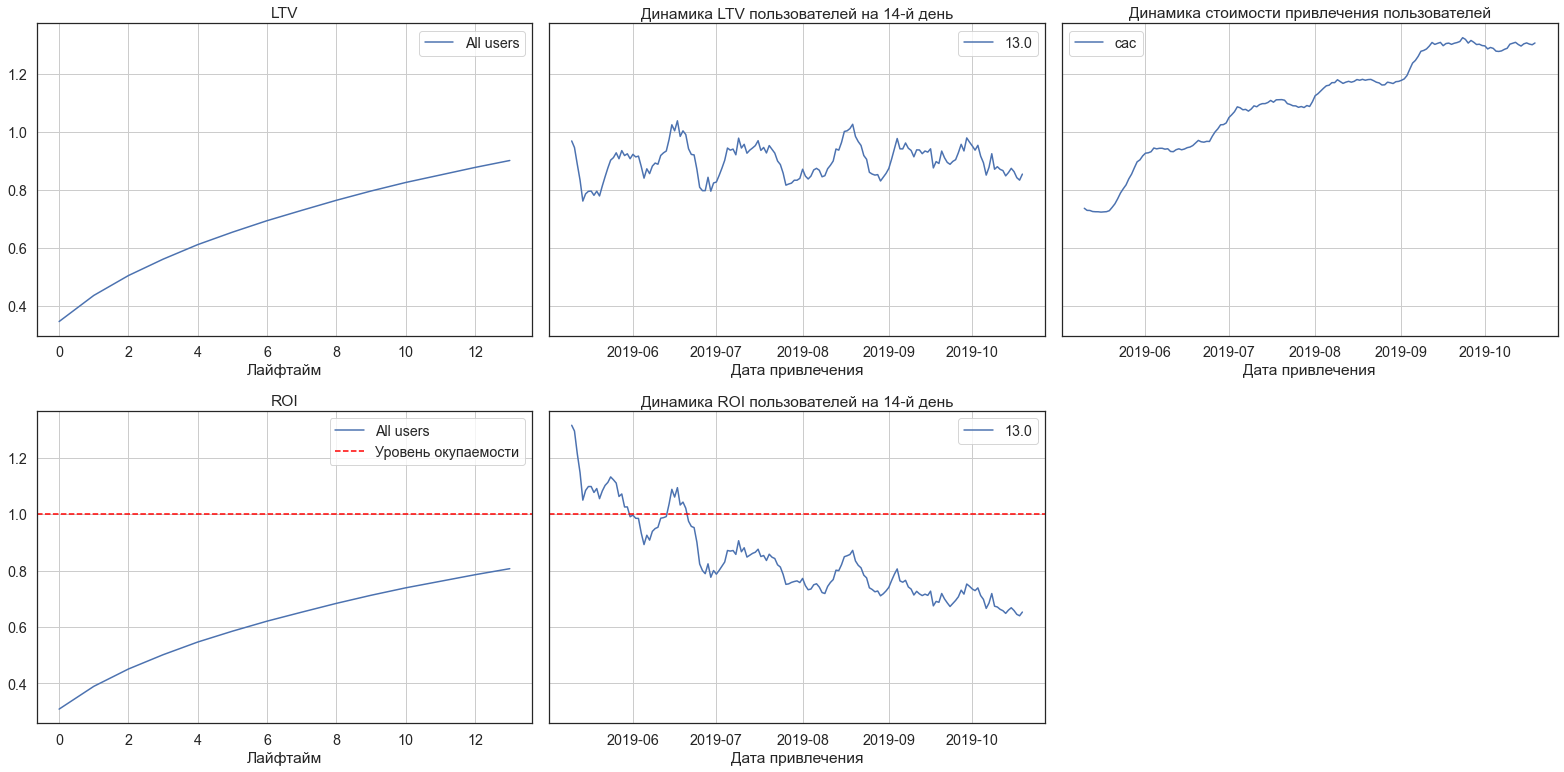

In [49]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=10)

По графикам мы можем сделать такие выводы:

- Реклама в целом не окупается. ROI 14 дня - около 80%
- LTV имеет некоторую сезонность, но довольно стабилен.
- CAC растет все 5 месяцев, а значит рекламный бюджет на привлечение 1го пользователя стабильно увеличивается
- ROI пользователей на 14 день падает ниже порога окупаемости уже к концу июня, и дальше имеет явную тенеденцию к снижению. Каждый новый привлеченный пользователь в среднем стоит нам дороже, а LTV не увеличивается.

Чтобы понять источник проблем, нужно пройти по всем доступным характеристикам пользователей — стране, источнику трафика и устройству, но вначале неплохо было бы оценить конверсию в покупку и то, насколько хорошо мы удерживаем пользователей.

### Анализ конверсии пользователей и динамики её изменения. Анализ Retention

In [50]:
raw_data, conversion, conversion_history = get_conversion(profiles_no_org,
                                           orders,
                                           observation_date,
                                           horizon_days)

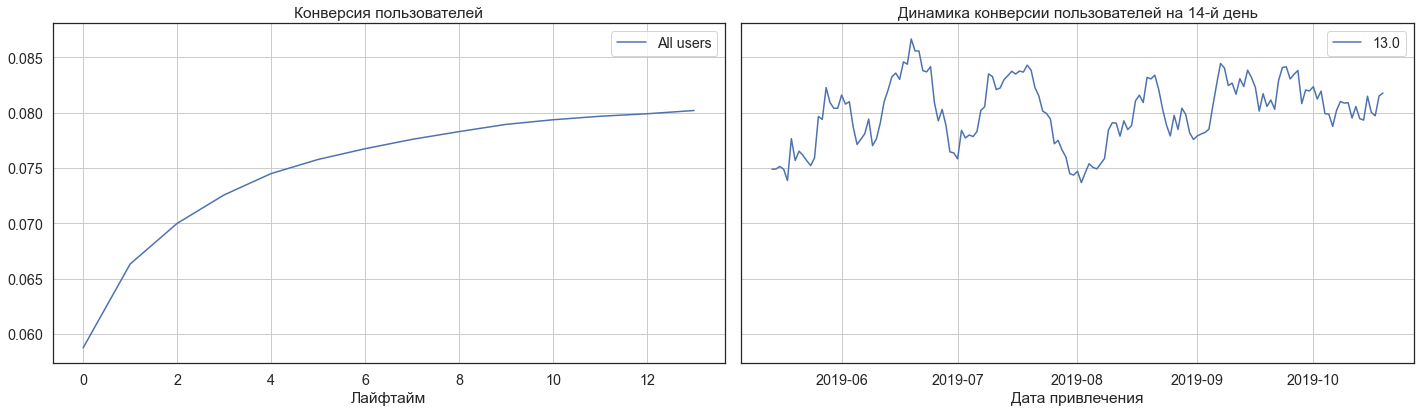

In [51]:
plot_conversion(conversion, 
                    conversion_history, 
                    horizon_days, 
                    window=14)

График конверсии показывает, что пользователи конвертируются в платящих вполне стабильно - на графике динамики присутствует сезонность, но в целом конверсия в покупку 14 дня выходит на плато и стабильна для всех пользователей, привлеченных за последние  5 месяцев.

In [52]:
raw_data, retention, retention_history = get_retention(
                                            profiles_no_org,
                                            visits,
                                            observation_date,
                                            horizon_days)

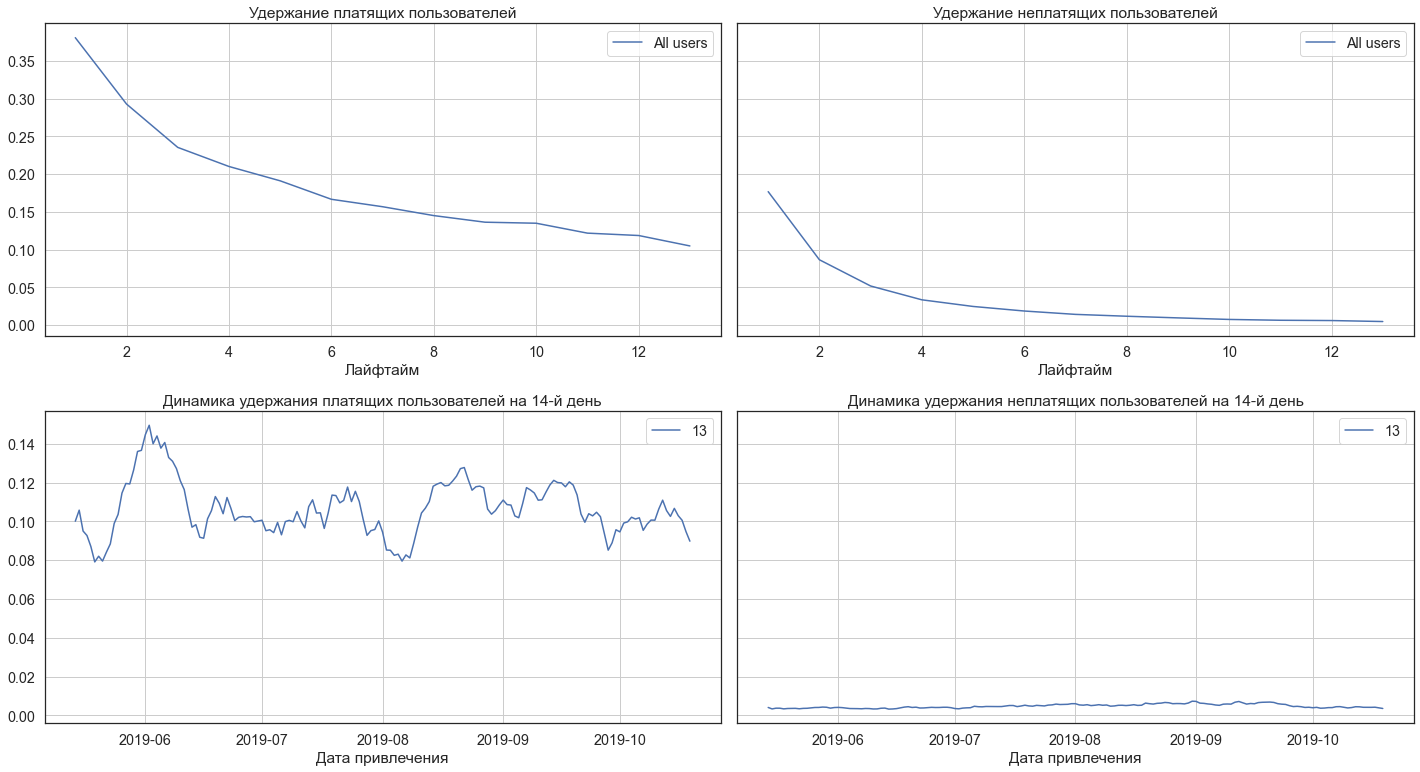

In [53]:
plot_retention(retention, 
                   retention_history, 
                   horizon_days, 
                   window=14
                  )

Что касается удержания пользователей, мы видим, что удержание платящих пользователей значительно лучше удержания неплатящих - retention rate к 14 дню у платящих польхователей 10%, а у наплатящих падает почти до нуля - причем у всех когорт, независимо от времени привлечения.  
  
Возможно, приложение изначально ориентировано на платные услуги, и его бесплатная часть урезана настолько, что не содержит ценности для пользователя, и он быстро уходит, или у нас не получается донести ценность нашего продукта до пользователей, не совершивших покупку.

В целом, в разрезе анализа падающей окупаемости, мы не видим таких же тенденций на графиках конверсии и удержания. Попробуем теперь посмотреть на окупаемость с разбивкой по устройствам, регионам и каналам дистрибуции.

### Анализ окупаемости рекламы с разбивкой по устройствам. (графики LTV и ROI, графики динамики LTV, CAC и ROI).

In [54]:
(result_raw, 
 ltv, 
 ltv_history, 
 roi, 
 roi_history) = get_ltv(profiles_no_org,
                        orders,
                        observation_date,
                        horizon_days,
                       dimensions=['device'])

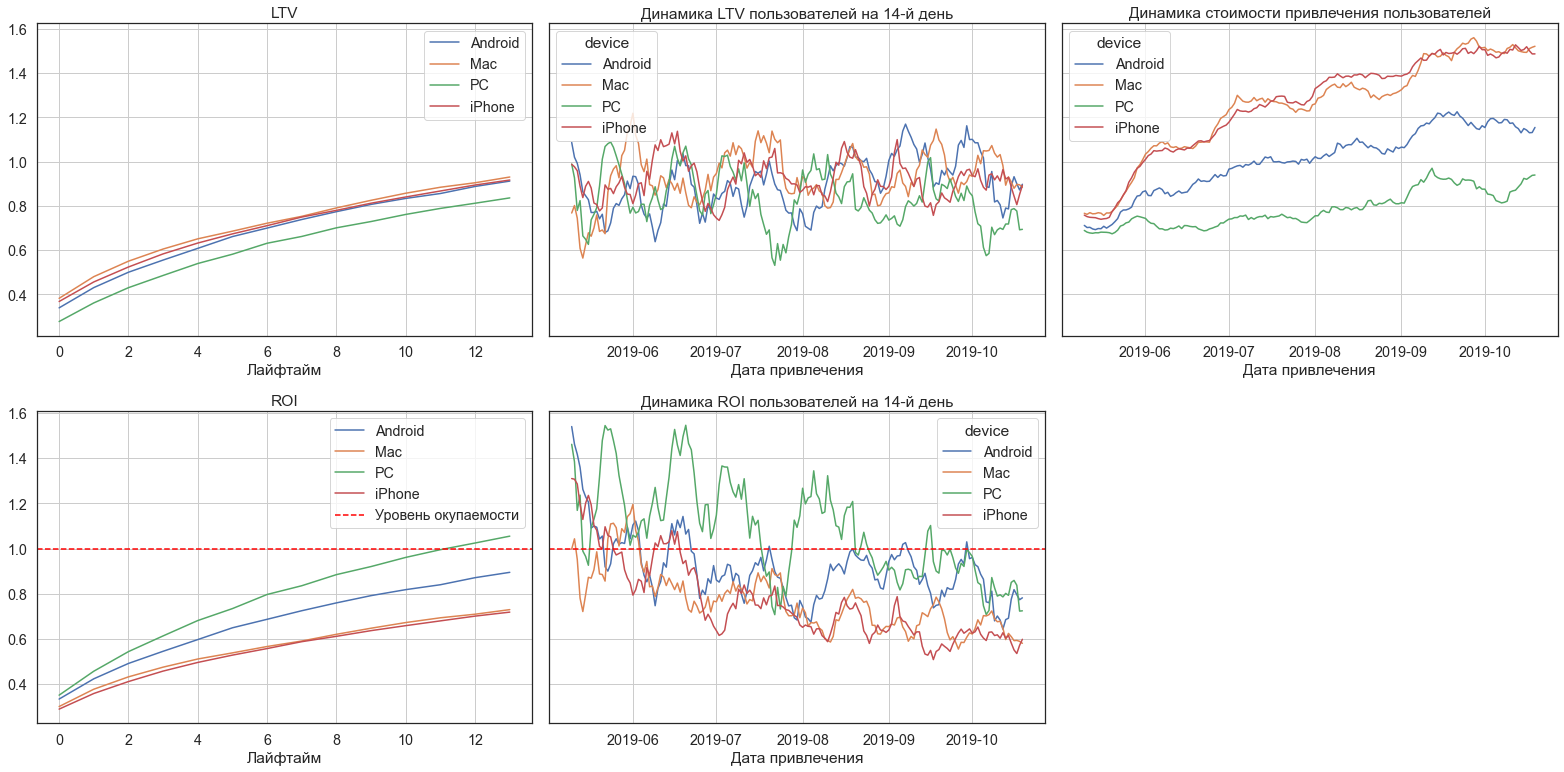

In [55]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=10)

По графикам с разбивкой по устройствам мы можем сделать такие выводы:

- К 14 дню реклама окупается только для PC, у остальных устройств ROI менее 100%, причем MAC и Apple не дотягивают и до 80% - и это при том, что LTV у PC стаблильно меньше, чем у остальных устройств.
- LTV 14 дня в динамике достаточно стабилен
- CAC также имеет тенденцию к росту все 5 месяцев у всех устройств, хотя у PC меньше всех, у MAC и Apple больше всех
- ROI пользователей на 14 день у всех устройств имеет явную тенеденцию к снижению, даже пользователи с PC, привлеченные в последний месяц, перестают окупаться.


Таким образом, проблемы с окупаемостью, по-видимому, не зависят от устройства, с которого приходит пользователь. Проверим окупаемость по странам.


### Анализ окупаемости рекламы с разбивкой по странам. (графики LTV и ROI, графики динамики LTV, CAC и ROI).


In [56]:
(result_raw, 
 ltv, 
 ltv_history, 
 roi, 
 roi_history) = get_ltv(profiles_no_org,
                        orders,
                        observation_date,
                        horizon_days,
                       dimensions=['region'])

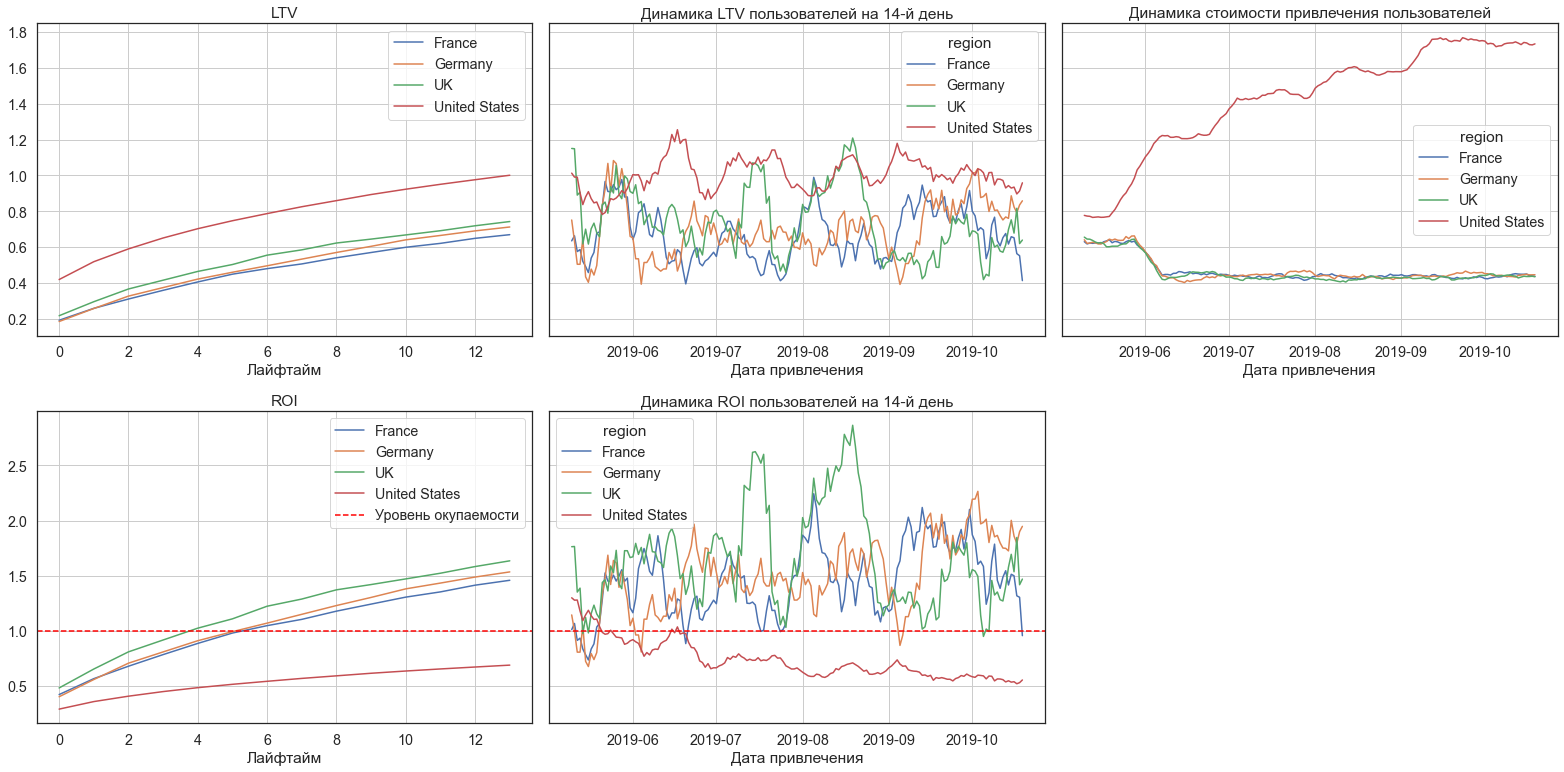

In [57]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=10)

По графикам окупаемости с разбивкой по странам мы можем сделать такие выводы:

- Можно выделить 2 сильно отличающихся кластера: США и другие страны.
- Пользователи из США приносят больше всего прибыли на пользователя (LTV), с 1 и до 14го дня, чем пользователи из остальных стран.
- Стоимость привлечения CAC в США растет с июня, при этом в остальных странах она сначала несколько падает, а потом стабилизируется.
- Видимо, поэтому юнит-экономика сходится у Франции, Германии и Великобритании уже к 4-5 дню, а у пользователей из США ROI 14 дня не достигает и 80%
- Динамика ROI пользователей на 14 день у США падает ниже порога окупаемости уже в июне, и в дальнейшем только снижается. У ROI других стран на 14 день подвержена сильной сезонности, но в целом стабильно выше порога окупаемости (а у пользователей из Германии даже имеет тенденцию к росту)  
  
  


Мы видим, что проблема окупаемости напрямую коррелирует со страной пользователя. Несмотря на то, что LTV пользователя из США стабильно выше остальных стран (а также, как мы помним, из США приходит больше всего пользлвателей, с самой высокой  конверсией в покупку), привлечение пользователя из США значительно дороже, и имеет тенденцию к росту, и возврат на инвестиции стабильно ниже порога окупаемости, причем имеет тенденцию к снижению. 
  
Однако, это не может быть конечной точкой анализа - ведь, как мы помним, рекламные каналы и США и остальных странам сильно отличаются, так что проанализируем показатели в разбивке по каналам дистрибуции.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам. (графики LTV и ROI, графики динамики LTV, CAC и ROI).

In [58]:
(result_raw, 
 ltv, 
 ltv_history, 
 roi, 
 roi_history) = get_ltv(profiles_no_org,
                        orders,
                        observation_date,
                        horizon_days,
                       dimensions=['channel'])

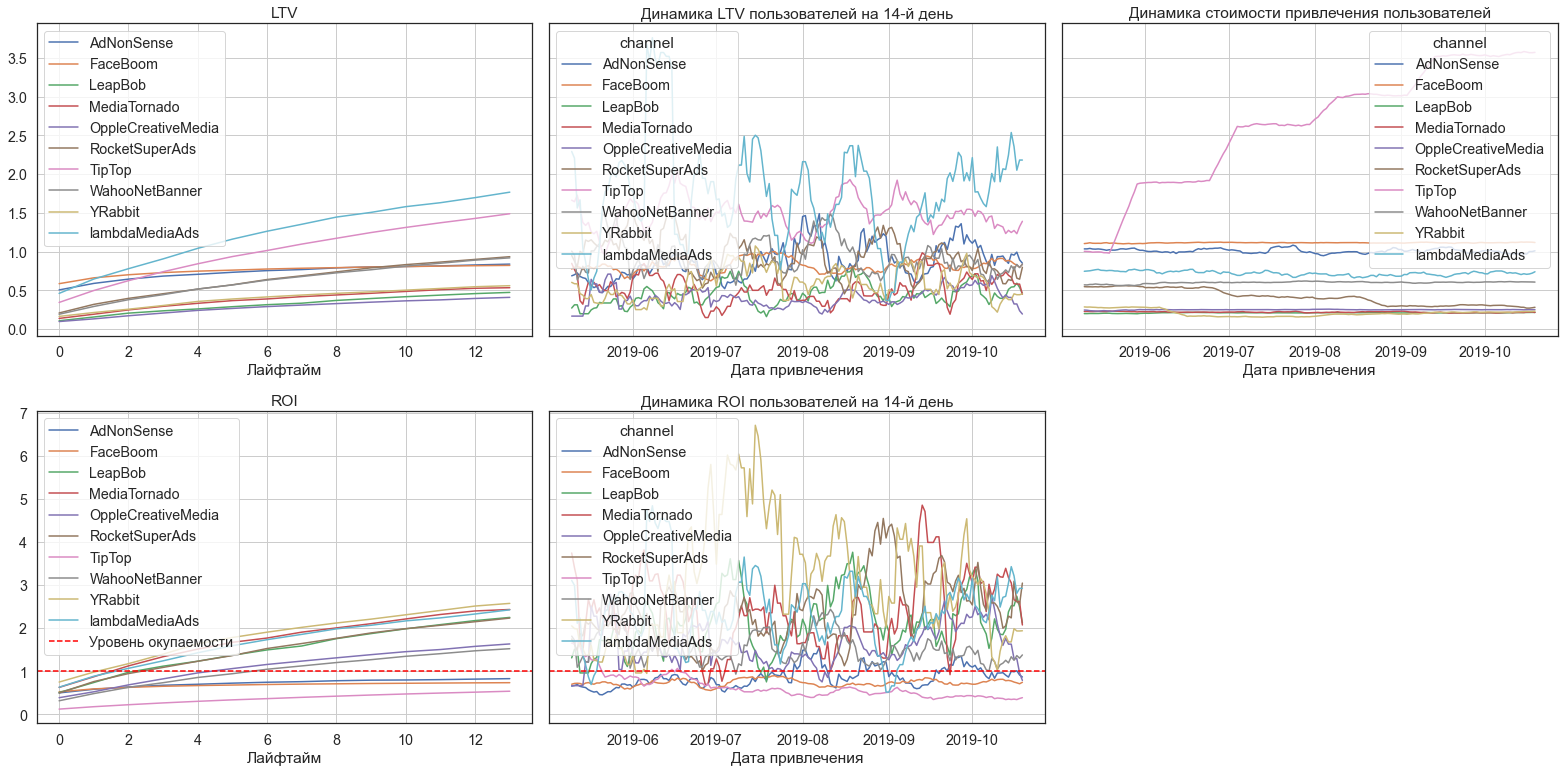

In [59]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=10)

По графикам окупаемости с разбивкой по каналам привлечения мы можем сделать такие выводы:

- Лучше всего LTV растет у каналов lambdaMediaAds и TipTop
- однако стоимость привлечения клиентов через TipTop сильно выделяется среди других каналов, начинает расти в июне, и за 5 месяцев вырастает больше, чем в 3 раза
- Поэтому этот канал дистрибуции, судя по графику ROI, не окупается к 14 дню, причем в динамике показывает ухудшание со временем.

Кажется, один из ответов на наш вопрос мы нашли: рекламный бюджет на TipTop очень сильно увеличился за 6 месяцев, а LTV привлеченных через него пользователей, несмотрят на то, что он довольно высок, не может окупить затраты на их привлечение. 

Убедимся, что при исключении этого канала показатели окупаемости меняются.


In [60]:
# показатели без учета TipTop
(result_raw, 
 ltv, 
 ltv_history, 
 roi, 
 roi_history) = get_ltv(profiles_no_org.query('channel not in ("TipTop")'),
                        orders,
                        observation_date,
                        horizon_days)

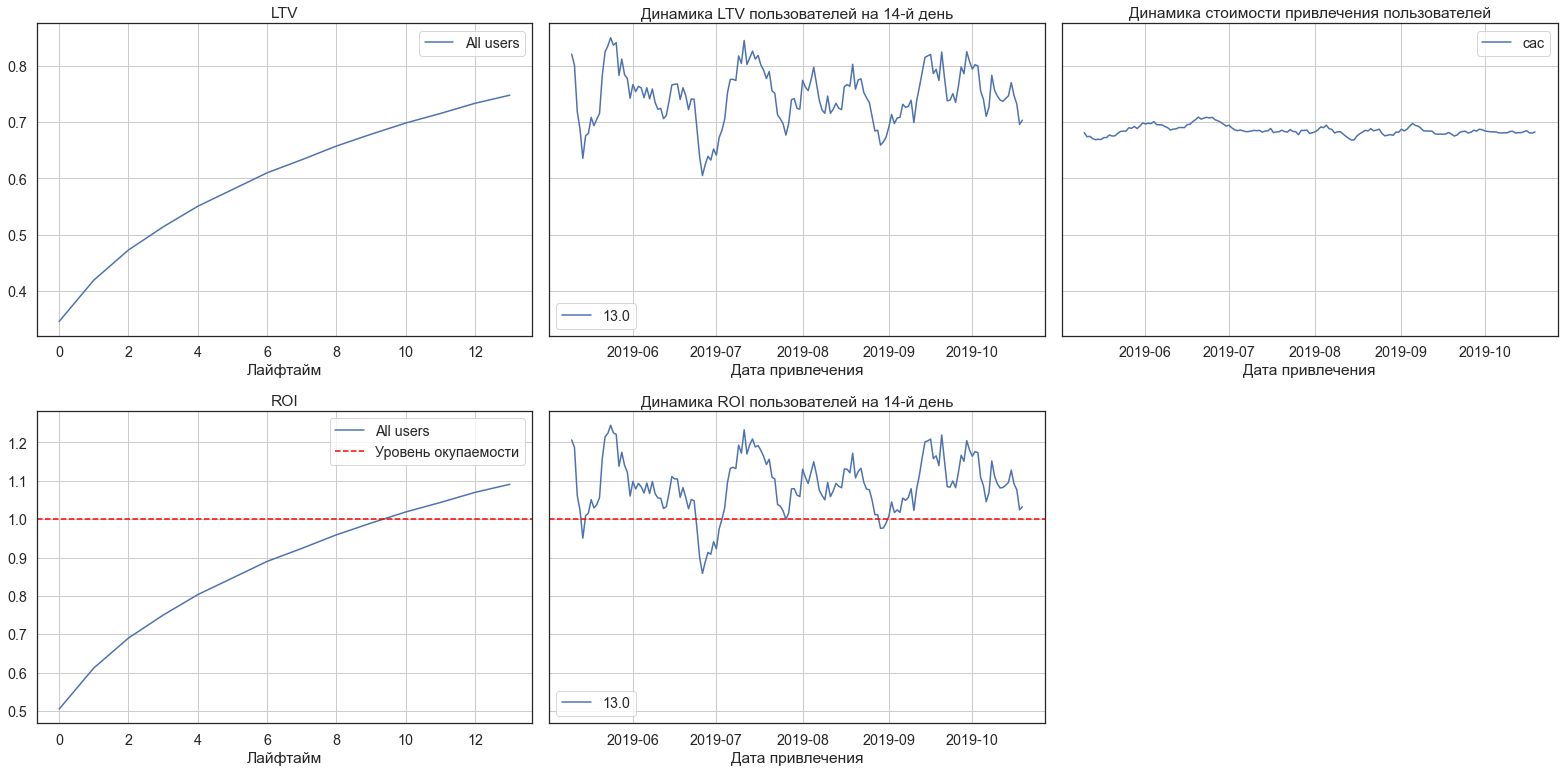

In [61]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=10)

Действительно, при исключении пожирающего рекламный бюджет канала TipTop, юнит-экономика сходится уже к 10 дню жизни пользователя в продукте.


Однако на графиках окупаемости с разбивкой по каналам привлечения мы видели, что TipTop - не единственный канал привлечения, тянущий вниз наши показатели окупаемости. Есть еще 2 канала с ROI ниже уровня окупаемости, так что привлеченные через них пользователи стабильно не окупаются к 14 дню жизни в приложении - FaceBoom и AdNonSense, хотя CAC по ним не росло со временем.

Для того, чтобы понять причины, проанализируем конверсию и удержание пользователей, по каналам привлечения, быть может, проблема этих каналов в этих показателях.


### Анализ конверсии пользователей и динамики её изменения, анализ Retention с разбивкой по каналам привлечения клиентов

In [62]:
raw_data, conversion, conversion_history = get_conversion(profiles_no_org,
                                           orders,
                                           observation_date,
                                           horizon_days,
                                           ['channel'])

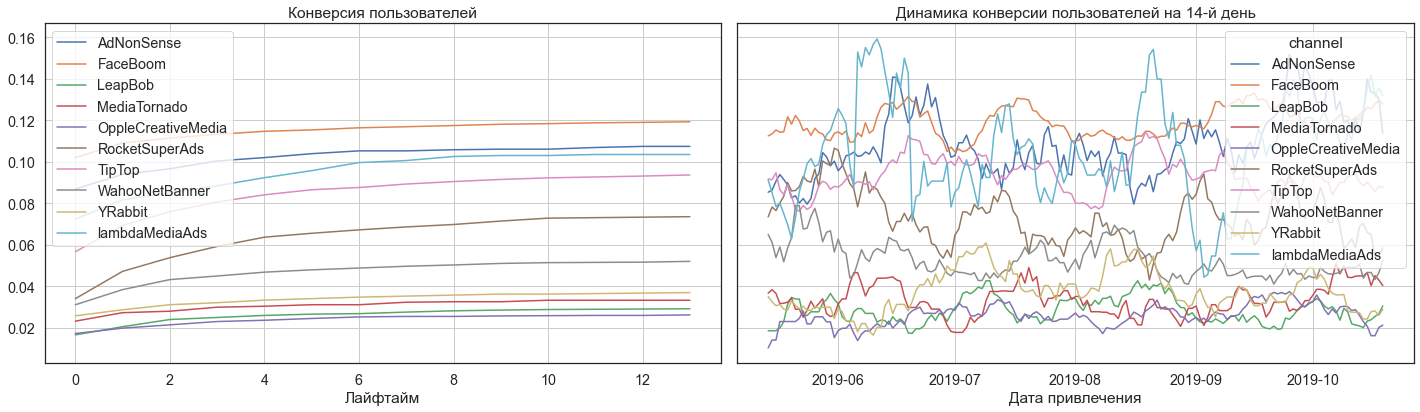

In [63]:
plot_conversion(conversion, 
                    conversion_history, 
                    horizon_days, 
                    window=14)

С коверсией у этих источников точно проблем нет, как мы уже знаем, у FaceBoom вообще самай высокая конверсия в платящего пользователя, да и AdNonSense не очень отстает. Нет резкого падения и со временем. Конверсия точно не объясняет проблему с окупаемостью пользователей с этих каналов.

Посмотрим на удержание.

In [64]:
# включим обратно органических пользователей, чтобы сравнить все каналы
raw_data, retention, retention_history = get_retention(
                                            profiles,
                                            visits,
                                            observation_date,
                                            horizon_days,
                                            ['channel'])

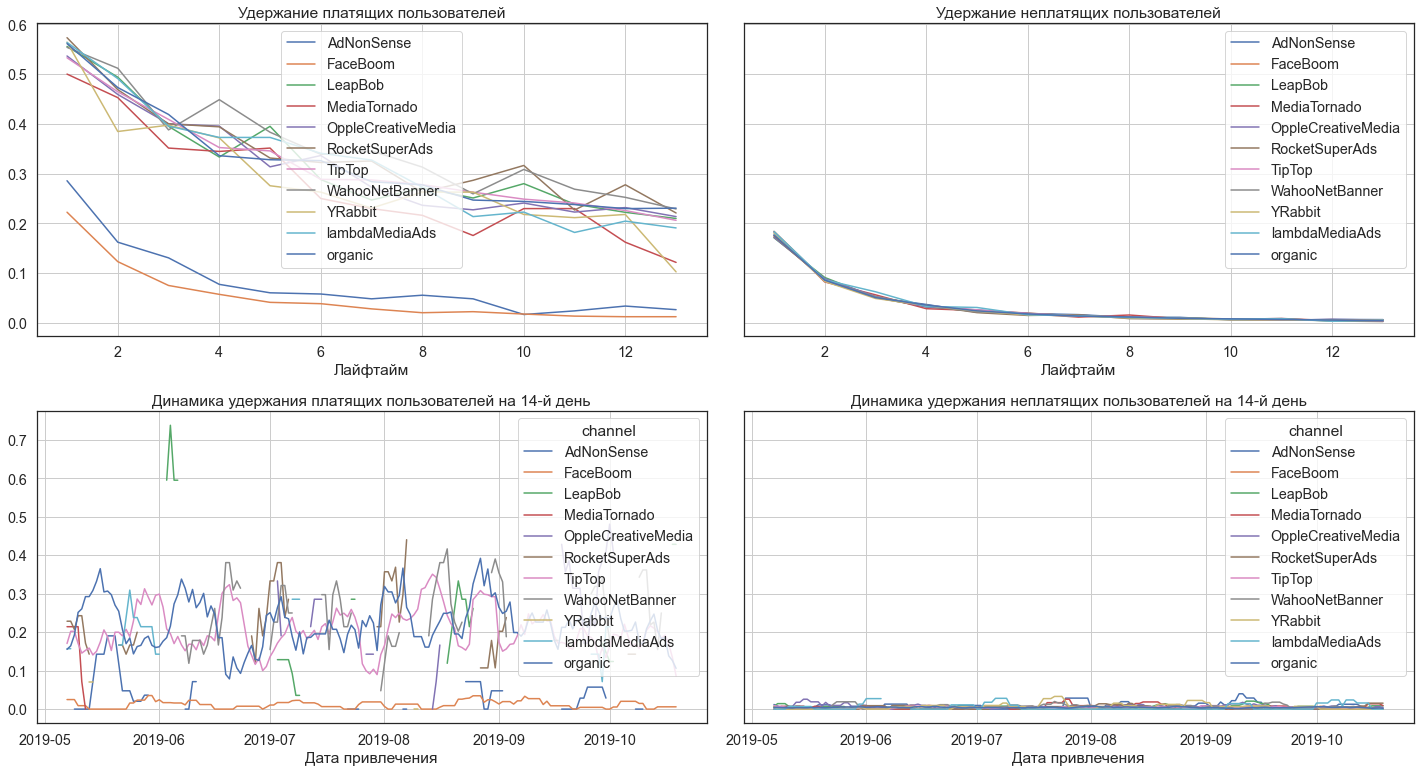

In [65]:
plot_retention(retention, 
                   retention_history, 
                   horizon_days, 
                   window=7
                  )

А вот тут совершенно другая картина. Мы видим, что мы удерживаем пользоваталей, привлеченных через FaceBoom и AdNonSense, значительно хуже пришедших из остальных каналов. Их retention rate _значительно_ ниже остальных каналов дистрибуции (даже органического трафика). По сути, его можно сравнить с удержанием неплатящих пользователей: почти все пользователи, пришедщие из этих двух каналов, покидают приложение уже к 10 дню.

Посмотрим на окупаемость, исключив эти 3 неокупающихся канала.

In [66]:
# показатели без учета TipTop, FaceBoom, AdNonSense
(result_raw, 
 ltv, 
 ltv_history, 
 roi, 
 roi_history) = get_ltv(profiles_no_org.query('channel not in ("TipTop", "FaceBoom", "AdNonSense")'),
                        orders,
                        observation_date,
                        horizon_days)

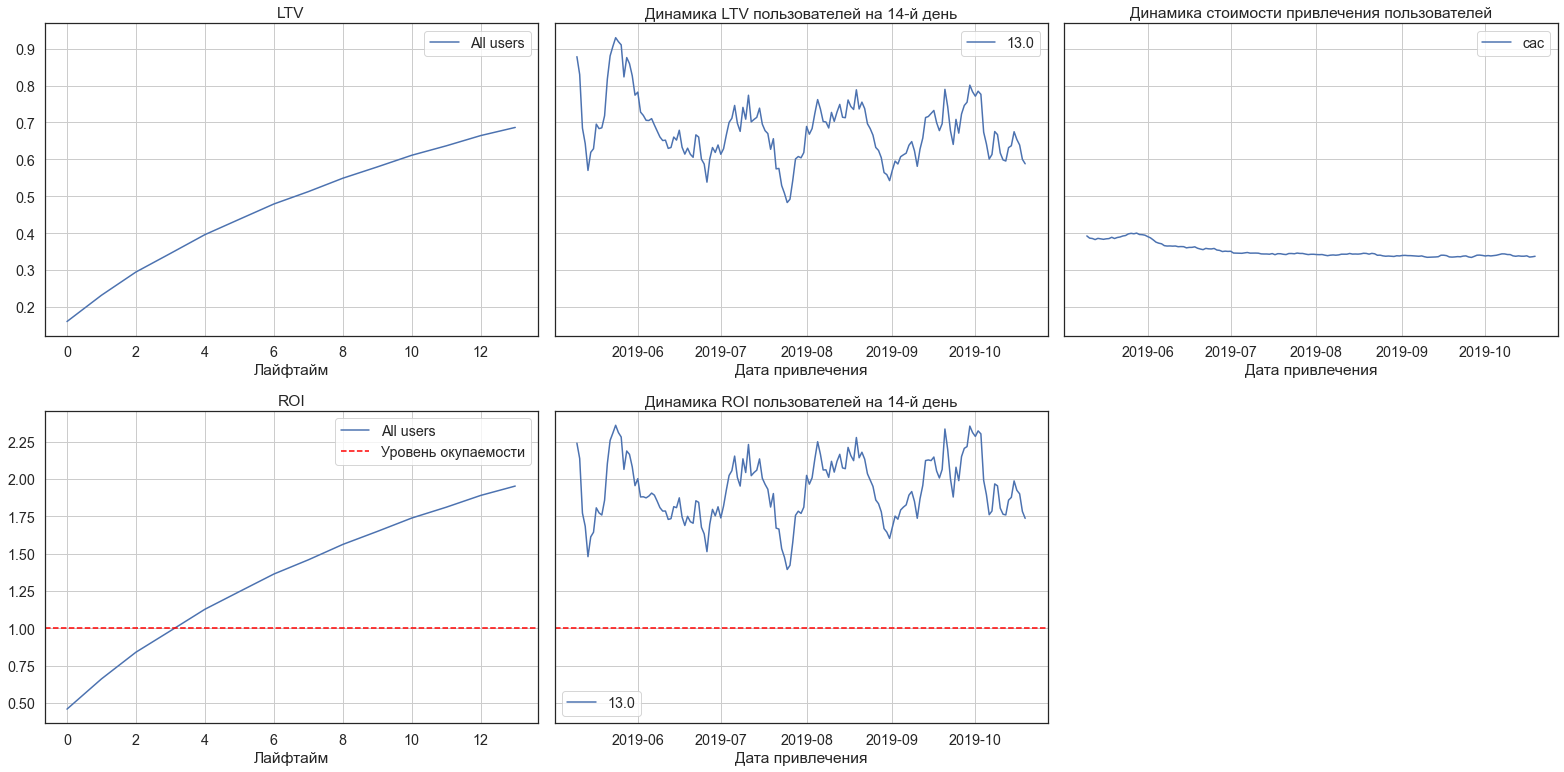

In [67]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=10)

Мы видим, что ретроспективно, если исключить 3 неокупающихся канала, юнит-экономика сходится уже к 3 дню жизни пользователя в продукте, а к 14-му дню маркетинговые вложения окупаются вдвое. 


Мы нашли причину того, что юнит-экономика по FaceBoom и AdNonSense не сходится. Пользователи, привлекаемые из этих 2х каналов сильно отличаются от остальных. Необходимо проанализировать, какие рекламные кампании проводятся в FaceBoom и AdNonSense - такое впечатление, что перешедшие оттуда пользователи ждут от нашего приложения чего-то другого, и, несмотря на то, что совершают покупку в приложении, не находят в наших услугах ценности для себя и быстро разочаровываются в продукте. 

## Общий вывод

Итак, мы провели анализ окупаемости маркетинговых расходов развлекательного приложения Procrastinate Pro+. 
  
У нас были данные за 6 месяцев - о привлечённых с 1 мая по 27 октября 2019 года пользователях: 150008 пользовательских профилей(платящих и нет), их покупках и расходах на их привлечение.

**Количество и доля платящих пользователей**

**Страна**: Больше всего пользователей - 66% от всех - приходят из США, доля платящих пользователей из этой страны также наибольшая (6,9%). Также приложением пользуются клиенты из Германии, Франции и Великобритании, но их значительно меньше, и доля платящих среди них меньше(около 4%).
  
**Устройство**: Доля платящих пользователей выше у пользователей, заходящих с Mac и Айфонов(чуть более 6%), чем с Андроида (5,85%) и PC(5%), но ненамного. Больше всего пользователей (36% от суммарного количества) пользуются Айфоном.

**Каналы привлечения**: Лучше всего привлекают платящих пользователей каналы FaceBoom (доля платящих пользователей 12,2%), AdNonSense (11,3%) и lambdaMediaAds (10,47%). По количеству пользователей в целом на первом месте органический трафик (37% от всех полльзователей приложения), но качественно он худший (платящих среди них - всего 2%). Второе место среди источников по числу привлеченных пользователей FaceBoom (19% от всех пользователей приходят через него).

**Маркетинговые расходы**

Общая сумма расходов на маркетинг за отчетный период - 105 497.3 долларов. Среди расходов на рекламные каналы с большим отрывом выходит вперед TipTop - больше половины рекламного бюджета было потрачено на него, на втором месте FaceBoom (около 30%). В динамике маркетинговые расходы по каналу TipTop выходят на первое место уже в мае, и стабильно увеличиваются с каждым месяцем. По итогам 6 месяцев средняя стоимость привлечения пользователя (CAC) через  TipTop более, чем вдвое превысила CAC даже на FaceBoom, приносящий больше всего трафика среди платных каналов (и наиболее эффективный).


Чтобы понять, оправдано ли такое распределение маркетингового бюджета, мы изучили, сколько прибыли приносят нам пользователи в целом, а также в разбивке по стране, источнику трафика и устройству, принимая во внимание, что в бизнес-плане заложено - пользователи должны окупаться не позднее чем через две недели после привлечения. Органический трафик не учитывали, так как затрат на рекламу по нему нет.

**Анализ окупаемости**

Мы оценили LifeTimeValue(LTV) покупателя, стоимость привлечения клиента CAC, возврат на инвестиции ROI в целом по пользователям и по каждому признаку, объединив пользователей в когорты по дню первого посещения приложения, а также приняли во внимание показатели конверсии в покупку и удержания (retention).

**В целом по пользователям:**

- Реклама в целом не окупается. ROI 14 дня - около 80%
- LTV стабилен
- CAC растет все 6 месяцев, а значит рекламный бюджет на привлечение одного пользователя постоянно увеличивается
- ROI пользователей на 14 день падает ниже порога окупаемости уже к концу июня, и дальше имеет явную тенеденцию к снижению. Каждый новый привлеченный пользователь в среднем стоит нам дороже, а его LTV не увеличивается.


Когортный анализ конверсии в покупку показал, что она стабильна для всех пользователей, и в среднем к 14 дню выходит на плато около 8%.
Анализ удержания показывает, что удержание платящих пользователей значительно лучше удержания неплатящих - retention rate к 14 дню у платящих польхователей 10%, а у наплатящих падает почти до нуля - причем у всех когорт, независимо от времени привлечения.


В целом, тенденций к падению в динамике на графиках конверсии и удержания нет.

**С разбивкой по устройствам:**

Проанализировав окупаемость в зависимости от устройства пользователя, мы увидели, что общие тенденции окупаемости сохраняются:

- К 14 дню реклама окупается только для PC, у остальных устройств ROI менее 100%
- LTV 14 дня в динамике достаточно стабилен
- CAC также имеет тенденцию к росту все 6 месяцев у всех устройств
- ROI пользователей на 14 день у всех устройств имеет явную тенеденцию к снижению, даже пользователи с PC, привлеченные в последний месяц, перестают окупаться.

Таким образом, проблемы с окупаемостью, по-видимому, не зависят от устройства, с которого приходит пользователь.

**С разбивкой по странам:**

По графикам окупаемости с разбивкой по странам мы можем сделать такие выводы:

- Можно выделить 2 сильно отличающихся кластера: США и другие страны.
- Пользователи из США стабильно приносят больше всего прибыли на пользователя (LTV).
- Стоимость привлечения CAC в США растет с июня, при этом в остальных странах она сначала несколько падает, а потом стабилизируется.
- Поэтому юнит-экономика сходится у Франции, Германии и Великобритании уже к 4-5 дню, а у пользователей из США ROI 14 дня не достигает и 80%
- ROI 14 дня в США падает ниже порога окупаемости уже в июне, и в дальнейшем только снижается. ROI 14 дня других стран стабильно выше порога окупаемости (а у пользователей из Германии даже имеет тенденцию к росту).

Мы видим, что проблема окупаемости напрямую коррелирует со страной пользователя. Несмотря на то, что LTV пользователя из США стабильно выше остальных стран (мы помним, из США приходит больше всего пользлвателей, с самой высокой конверсией в покупку), привлечение пользователя из США значительно дороже, и это цена растет с кажым месяцем, и возврат на инвестиции стабильно ниже порога окупаемости, причем с каждым месяцем снижается.

Мы помним, рекламные каналы и США и остальных странам сильно отличаются, так что мы проанализировали показатели в разбивке по каналам дистрибуции.

**С разбивкой по каналам дистрибуции:**

По графикам окупаемости с разбивкой по каналам привлечения мы можем сделать такие выводы:

- Лучше всего LTV у каналов lambdaMediaAds и TipTop
- Однако стоимость привлечения клиентов через TipTop сильно выделяется среди других каналов, начинает расти в июне, и за 5 месяцев вырастает больше, чем в 3 раза
- Поэтому этот канал дистрибуции, судя по графику ROI, не окупается к 14 дню, и в динамике ухудщается со временем.

***Кажется, один из ответов на наш вопрос мы нашли: рекламный бюджет на TipTop сильно увеличился за 5 месяцев, а LTV привлеченных через него пользователей, несмотря на то, что довольно высок, не может окупить затраты на их привлечение. При исключении канала TipTop, юнит-экономика ошлась бы уже к 10 дню жизни пользователя в продукте.***

Однако на графиках окупаемости с разбивкой по каналам привлечения мы видели, что TipTop - не единственный канал привлечения, тянущий вниз наши показатели окупаемости. Есть еще 2 канала с ROI ниже уровня окупаемости, привлеченные через них пользователи стабильно не окупаются к 14 дню жизни в приложении - FaceBoom и AdNonSense, хотя CAC по ним не росло со временем.

Для того, чтобы понять причины, мы проанализировали конверсию и удержание пользователей по каналам привлечения, и выяснили:

- Конверсия в покупку стабильно высокая у всех каналов, у этих двух даже выше остальных
- Удержание пользователей, привлеченных через FaceBoom и AdNonSense, значительно хуже остальных. Их retention rate ниже всех каналов дистрибуции. По сути, его можно сравнить с удержанием неплатящих пользователей: почти все пользователи, пришедщие из этих двух каналов, покидают приложение уже к 10 дню.

***Мы нашли причину того, что юнит-экономика по FaceBoom и AdNonSense не сходится. Пользователи, привлекаемые через эти 2 канала, сильно отличаются от остальных: почти все они покидают приложение уже к 10 дню. Если исключить 3 неокупающихся канала, юнит-экономика сходилась бы уже к 3 дню жизни пользователя в продукте, а к 14-му дню маркетинговые вложения окупались вдвое.***

**Рекомендации для отдела маркетинга**

1. Нужно переоценить величину рекламного бюджета на канал TipTop, привлеченные через него клиенты приносят нам недостаточно прибыли, чтобы окупить рекламные вложения. Возможно, это новый потенциально огромный канал дистрибуции, и мы готовы некоторое время вкладывать больше, чем получаем, если мы хотим обойти конкурентов, или считаем, что эти вложения способны привести нам много органического трафика из-за вирусности рекламы, но должны быть некоторые критерии, дающие нам понять, когда стоит остановиться. Пока кажется, что рекламный бюджет на этот канал растет с каждым месяцем, при этом не окупается и тянет компанию вниз.

2. Необходимо проанализировать, какие рекламные кампании проводились в FaceBoom и AdNonSense, и чем они отличались от кампаний через другие каналы дистрибуции - такое впечатление, что перешедшие оттуда пользователи ждут от нашего приложения чего-то другого, и, несмотря на то, что совершают покупку в приложении, не находят в наших услугах ценности для себя и быстро разочаровываются в продукте. Судя по пришедшим клиентам, это весьма качественные каналы, пользователи, пришедшие через них, готовы тратить деньги, но что-то из разочаровывает.

3. Это уже не маркетинговому отделу, а рекомендация в целом: Рекомендовала бы обратить внимание на органический трафик - через него приходит очень много пользователей, а конверсия в покупку минимальна. Увеличение конверсии в покупку даже на 1 п.п. принесет компании большую прибыль. Возможно, стоит поработать над процессом онбординга, такое впечатление, что посетителям, которые приходят из платных каналов, мы лучше доносим ценность нашего приложения (кроме FaceBoom и AdNonSense), а для случайных посетителей она остается неочевидной. Стоит построить воронку онбординга, и посмотреть, где отваливается органический трафик.

